In [1]:
#!/usr/bin/python
#import wradlib as wrl
import pylab as pl
from glob import glob
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np

import csv
import os
import datetime
import pandas as pd

#shapefile: GIS vector data format (ESRI)
import shapefile as shp  # Requires the pyshp package
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import ticker
import netCDF4 as nc4
from datetime import date,timedelta
import plotly.graph_objs as go
import matplotlib.lines as mlines
import seaborn as sns
import shapely
from geopandas.tools import sjoin

import importlib
import geopandas as gpd
import xarray as xr
import cartopy.crs as ccrs  # Projections list

import _pickle as pickle

#import external functions (need pip install ipynb)
import ipynb.fs.full.HaileventsFunctions as HF

# Notebook to compare filtered and non-filtered OTs  for the full 3-years set


In [2]:
#Folder address containing data:
fold = '/home/ciccuz/phd/KIT/hail_data/'
plt_fold = '/home/ciccuz/phd/KIT/scripts/plots/OT_filt-nonfilt_comparison_fullSet'

In [3]:
# must run the bash command: sshfs -p22 giordano@imk-tss-risk:/hail4/punge/ ./hail4_punge/

#With geopandas: NEW VERSION!
sfg_ita = gpd.read_file(fold + "hail4_punge/geodata/ITA_adm/ITA_adm0.shp", encoding='latin-1')
sfg_deu = gpd.read_file(fold + "hail4_punge/geodata/DEU_adm/DEU_adm0.shp", encoding='latin-1')
sfg_aut = gpd.read_file(fold + "hail4_punge/geodata/AUT_adm/AUT_adm0.shp", encoding='latin-1')
sfg_che = gpd.read_file(fold + "hail4_punge/geodata/CHE_adm/CHE_adm0.shp", encoding='latin-1')
sfg_cro = gpd.read_file(fold + "hail4_punge/geodata/Croatia/mj788hg8036.shp", encoding='latin-1')
sfg_slo = gpd.read_file(fold + "hail4_punge/geodata/Slovenia/gk259nt7452.shp", encoding='latin-1')
sfg_hun = gpd.read_file(fold + "hail4_punge/geodata/Hungary/qh513vs8921.shp", encoding='latin-1')
sfg_alg = gpd.read_file(fold + "hail4_punge/geodata/algeria/rt767cn2098.shp", encoding='latin-1')
sfg_tun = gpd.read_file(fold + "hail4_punge/geodata/tunisia/TUN_adm0.shp", encoding='latin-1')
sfg_bos = gpd.read_file(fold + "hail4_punge/geodata/bosnia/bt512fj0408.shp", encoding='latin-1')
sfg_fra = gpd.read_file(fold + "hail4_punge/geodata/france/dw125xh0996.shp", encoding='latin-1')
sfg_mon = gpd.read_file(fold + "hail4_punge/geodata/montenegro/MNE_adm0.shp", encoding='latin-1')
sfg_cze = gpd.read_file(fold + "hail4_punge/geodata/czech/CZE_adm0.shp", encoding='latin-1')
sfg_svk = gpd.read_file(fold + "hail4_punge/geodata/slovakia/SVK_adm0.shp", encoding='latin-1')


#lat/lon coords to cover the whole SPHERA domain:
lonmin=6; lonmax=19; latmin=35; latmax=49
latplot=[latmin,latmax]; lonplot=[lonmin,lonmax]

#maps limits whole SPHERA domain
x_lim=lonplot
y_lim=latplot


#shapefile in vector form for considering multiple geographic shapefiles
sf_geo = [sfg_ita, sfg_aut, sfg_deu, sfg_che, sfg_cro, sfg_slo, sfg_hun, sfg_alg, sfg_tun, sfg_fra, sfg_bos,
          sfg_mon, sfg_cze, sfg_svk]

sfg_land = gpd.read_file(fold + "hail4_punge/geodata/Land/ne_10m_land.shp", encoding='latin-1')

hhmin=0; hhmax=23

#Read and store cities and their features to be used in the maps:
clonsel, clatsel, csizesel, cnamesel, ckindsel = HF.HF_cities(latmin,latmax,lonmin,lonmax)

In [9]:
#LIST OF DAYS WITH JULIAN DAY AND DATETIME FORMAT:

#days in 2016: 214 days (actually 211 because the following days are missing: 2016185,2016186,2016201 )
days_2016 = [2016092,2016093,2016094,2016095,2016096,2016097,2016098,2016099,2016100,2016101,2016102,2016103,2016104,
        2016105,2016106,2016107,2016108,2016109,2016110,2016111,2016112,2016113,2016114,2016115,2016116,2016117,
        2016118,2016119,2016120,2016121,2016122,2016123,2016124,2016125,2016126,2016127,2016128,2016129,2016130,
        2016131,2016132,2016133,2016134,2016135,2016136,2016137,2016138,2016139,2016140,2016141,2016142,2016143,
        2016144,2016145,2016146,2016147,2016148,2016149,2016150,2016151,2016152,2016153,2016154,2016155,2016156,
        2016157,2016158,2016159,2016160,2016161,2016162,2016163,2016164,2016165,2016166,2016167,2016168,2016169,
        2016170,2016171,2016172,2016173,2016174,2016175,2016176,2016177,2016178,2016179,2016180,2016181,2016182,
        2016183,2016184,2016185,2016186,2016187,2016188,2016189,2016190,2016191,2016192,2016193,2016194,2016195,
        2016196,2016197,2016198,2016199,2016200,2016201,2016202,2016203,2016204,2016205,2016206,2016207,2016208,
        2016209,2016210,2016211,2016212,2016213,2016214,2016215,2016216,2016217,2016218,2016219,2016220,2016221,
        2016222,2016223,2016224,2016225,2016226,2016227,2016228,2016229,2016230,2016231,2016232,2016233,2016234,
        2016235,2016236,2016237,2016238,2016239,2016240,2016241,2016242,2016243,2016244,2016245,2016246,2016247,
        2016248,2016249,2016250,2016251,2016252,2016253,2016254,2016255,2016256,2016257,2016258,2016259,2016260,
        2016261,2016262,2016263,2016264,2016265,2016266,2016267,2016268,2016269,2016270,2016271,2016272,2016273,
        2016274,2016275,2016276,2016277,2016278,2016279,2016280,2016281,2016282,2016283,2016284,2016285,2016286,
        2016287,2016288,2016289,2016290,2016291,2016292,2016293,2016294,2016295,2016296,2016297,2016298,2016299,
        2016300,2016301,2016302,2016303,2016304,2016305]

#days in 2017: missing 1 april (2017091), 213 days
days_2017 = [2017091,2017092,2017093,2017094,2017095,2017096,2017097,2017098,2017099,2017100,2017101,2017102,2017103,2017104,
        2017105,2017106,2017107,2017108,2017109,2017110,2017111,2017112,2017113,2017114,2017115,2017116,2017117,
        2017118,2017119,2017120,2017121,2017122,2017123,2017124,2017125,2017126,2017127,2017128,2017129,2017130,
        2017131,2017132,2017133,2017134,2017135,2017136,2017137,2017138,2017139,2017140,2017141,2017142,2017143,
        2017144,2017145,2017146,2017147,2017148,2017149,2017150,2017151,2017152,2017153,2017154,2017155,2017156,
        2017157,2017158,2017159,2017160,2017161,2017162,2017163,2017164,2017165,2017166,2017167,2017168,2017169,
        2017170,2017171,2017172,2017173,2017174,2017175,2017176,2017177,2017178,2017179,2017180,2017181,2017182,
        2017183,2017184,2017185,2017186,2017187,2017188,2017189,2017190,2017191,2017192,2017193,2017194,2017195,
        2017196,2017197,2017198,2017199,2017200,2017201,2017202,2017203,2017204,2017205,2017206,2017207,2017208,
        2017209,2017210,2017211,2017212,2017213,2017214,2017215,2017216,2017217,2017218,2017219,2017220,2017221,
        2017222,2017223,2017224,2017225,2017226,2017227,2017228,2017229,2017230,2017231,2017232,2017233,2017234,
        2017235,2017236,2017237,2017238,2017239,2017240,2017241,2017242,2017243,2017244,2017245,2017246,2017247,
        2017248,2017249,2017250,2017251,2017252,2017253,2017254,2017255,2017256,2017257,2017258,2017259,2017260,
        2017261,2017262,2017263,2017264,2017265,2017266,2017267,2017268,2017269,2017270,2017271,2017272,2017273,
        2017274,2017275,2017276,2017277,2017278,2017279,2017280,2017281,2017282,2017283,2017284,2017285,2017286,
        2017287,2017288,2017289,2017290,2017291,2017292,2017293,2017294,2017295,2017296,2017297,2017298,2017299,
        2017300,2017301,2017302,2017303,2017304]

#days in 2018: missing 1 april (2018091) and 17 june (2018168), 212 days
days_2018 = [2018091,2018092,2018093,2018094,2018095,2018096,2018097,2018098,2018099,2018100,2018101,2018102,2018103,2018104,
        2018105,2018106,2018107,2018108,2018109,2018110,2018111,2018112,2018113,2018114,2018115,2018116,2018117,
        2018118,2018119,2018120,2018121,2018122,2018123,2018124,2018125,2018126,2018127,2018128,2018129,2018130,
        2018131,2018132,2018133,2018134,2018135,2018136,2018137,2018138,2018139,2018140,2018141,2018142,2018143,
        2018144,2018145,2018146,2018147,2018148,2018149,2018150,2018151,2018152,2018153,2018154,2018155,2018156,
        2018157,2018158,2018159,2018160,2018161,2018162,2018163,2018164,2018165,2018166,2018167,2018168,2018169,
        2018170,2018171,2018172,2018173,2018174,2018175,2018176,2018177,2018178,2018179,2018180,2018181,2018182,
        2018183,2018184,2018185,2018186,2018187,2018188,2018189,2018190,2018191,2018192,2018193,2018194,2018195,
        2018196,2018197,2018198,2018199,2018200,2018201,2018202,2018203,2018204,2018205,2018206,2018207,2018208,
        2018209,2018210,2018211,2018212,2018213,2018214,2018215,2018216,2018217,2018218,2018219,2018220,2018221,
        2018222,2018223,2018224,2018225,2018226,2018227,2018228,2018229,2018230,2018231,2018232,2018233,2018234,
        2018235,2018236,2018237,2018238,2018239,2018240,2018241,2018242,2018243,2018244,2018245,2018246,2018247,
        2018248,2018249,2018250,2018251,2018252,2018253,2018254,2018255,2018256,2018257,2018258,2018259,2018260,
        2018261,2018262,2018263,2018264,2018265,2018266,2018267,2018268,2018269,2018270,2018271,2018272,2018273,
        2018274,2018275,2018276,2018277,2018278,2018279,2018280,2018281,2018282,2018283,2018284,2018285,2018286,
        2018287,2018288,2018289,2018290,2018291,2018292,2018293,2018294,2018295,2018296,2018297,2018298,2018299,
        2018300,2018301,2018302,2018303,2018304]

In [10]:
#write dataframes storing julian days and datetimes of OT days:

days_2016_df =pd.DataFrame(index=np.arange(0,len(days_2016),1), columns=['day','dtime'])
days_2017_df =pd.DataFrame(index=np.arange(0,len(days_2017),1), columns=['day','dtime'])
days_2018_df =pd.DataFrame(index=np.arange(0,len(days_2018),1), columns=['day','dtime'])

for day,ind in zip(days_2016,np.arange(0,len(days_2016),1)):
    
    dtime = datetime.datetime.strptime('2016-04-01','%Y-%m-%d') + timedelta(days=int(ind)) 
    
    days_2016_df.iloc[ind]['day'] = day
    days_2016_df.iloc[ind]['dtime'] = dtime    

for day,ind in zip(days_2017,np.arange(0,len(days_2017),1)):
    
    dtime = datetime.datetime.strptime('2017-04-01','%Y-%m-%d') + timedelta(days=int(ind)) 
    
    days_2017_df.iloc[ind]['day'] = day
    days_2017_df.iloc[ind]['dtime'] = dtime    
    
for day,ind in zip(days_2018,np.arange(0,len(days_2018),1)):
    
    dtime = datetime.datetime.strptime('2018-04-01','%Y-%m-%d') + timedelta(days=int(ind)) 
    
    days_2018_df.iloc[ind]['day'] = day
    days_2018_df.iloc[ind]['dtime'] = dtime    

days_2016_df.dtime = pd.to_datetime(days_2016_df.dtime)
days_2017_df.dtime = pd.to_datetime(days_2017_df.dtime)
days_2018_df.dtime = pd.to_datetime(days_2018_df.dtime)

#REMOVE MISSING DAYS (after creating dataframes otherwise day and dtime are shifted and wrong!!!)

#-2016: 2016185,2016186,2016201
days_2016_df = days_2016_df[(days_2016_df.day !=2016185) & (days_2016_df.day !=2016186) & 
                            (days_2016_df.day !=2016201)]
#-2017: 2017091 
days_2017_df = days_2017_df[days_2017_df.day != 2017091]

#-2018: 2018091, 2018168
days_2018_df = days_2018_df[(days_2018_df.day != 2018091) & (days_2018_df.day != 2018168)]

In [13]:
days_2016_df

,day,dtime
0,2016092,2016-04-01
1,2016093,2016-04-02
2,2016094,2016-04-03
3,2016095,2016-04-04
4,2016096,2016-04-05
...,...,...
209,2016301,2016-10-27
210,2016302,2016-10-28
211,2016303,2016-10-29
212,2016304,2016-10-30


### - Comparison for single days

In [107]:
d_ind = 160
day = days_2017_df['day'][d_ind]
dtime = days_2017_df['dtime'][d_ind]

dtime,day

(datetime.datetime(2017, 9, 9, 0, 0), 2017252)

In [108]:
#Read ESWD hail report data: store lat, lon, hail size and datetime, and retain only data in the selected area/time
if (dtime.year >= 1995) & (dtime.year <= 2020):

    #df_eswd = pd.read_csv('/home/bg2896/hail4_giordani/hail_obs/Insurance_ESSL_Italy_data/original_ungridded_data/ESSL/9313218694_v1_6_Giordani_LargeHail_Italy_1995-01-01_2020-12-31_data.csv')
    df_eswd = pd.read_csv(fold + 'hail4_punge/ESWD/ESWD_HAIL_19790101-20200531_v1_6.csv')   #Swabian Jura 2013
    
    #selection over the whole SPHERA domain
    eswd_ev_sel = HF.HF_eswd_df(df_eswd,dtime.year,dtime.month,dtime.day,hhmin,hhmax,latmin,latmax,lonmin,lonmax)
   
else:
    eswd_ev_sel = pd.DataFrame()
   
eswd_ev_sel

,datetime,lat,lon,size,QC_level,geometry


In [66]:
df_unipol = pd.read_csv(fold + 'data/ESWD_insurance/Insurance_ESSL_Italy_data/original_ungridded_data/UNIPOL/Estrazione_SINISTRI_GRANDINE_E_VENTO_ITALIA_DateLatLon.csv')
    
#selection over Italy
u_ev_sel = HF.HF_unipol_df(df_unipol,dtime.year,dtime.month,dtime.day,hhmin,hhmax,latmin,latmax,lonmin,lonmax)
u_ev_sel

,datetime,lon,lat,geometry
0,2017-09-09 00:01:00,9.310692,45.61005,POINT (9.31069 45.61005)


In [67]:
#read dictionary from external file
with open(fold + f'data/OT_filtered_data/tempAgg_3h_5-95pThresh/{dtime.year}/OTfilt_{day}.txt', "rb") as file:  
     OT_dict = pickle.load(file)

In [68]:
orig_OT = OT_dict['ORIGINAL_OTs']
filt_OT = OT_dict['FILTERED_OTs']

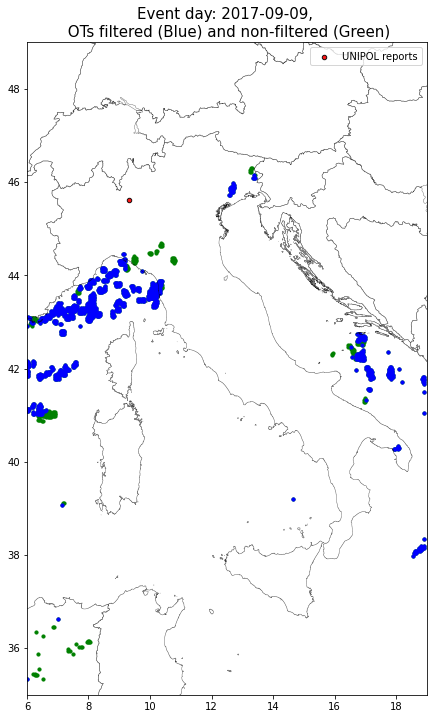

In [69]:
fig, ax = plt.subplots(figsize = (20,12))

plt.xlim(x_lim)
plt.ylim(y_lim) #y_lim

#filtered and non-filtered OTs detections    
for hour in orig_OT.keys():
    orig_OT[hour][['otpmax','geometry']].plot(ax=ax, markersize=10, figsize=(12, 8), column='otpmax', 
                                              color='green', zorder=1)
    if len(filt_OT[hour]) != 0:
        filt_OT[hour][['otpmax','geometry']].plot(ax=ax, markersize=10, figsize=(12, 8), column='otpmax', 
                                                  color='blue', zorder=2)
#shapefiles    
for shp in sf_geo:
    shp.plot(ax=ax, alpha = 0.5, facecolor = 'none', lw = 0.5, zorder=2)

#eswd 
if len(eswd_ev_sel) != 0:
    pl.scatter(eswd_ev_sel.lon,eswd_ev_sel.lat,55,c='red',marker="^",edgecolor='k',alpha=0.9,zorder=4, 
           label='ESWD reports')
#unipol
if len(u_ev_sel) != 0:
    pl.scatter(u_ev_sel.lon,u_ev_sel.lat,20,c='red',marker="o",edgecolor='k',alpha=0.9,zorder=4, 
           label='UNIPOL reports')

plt.legend(loc='best')

plt.title(f'Event day: {dtime.year}-{dtime.month:02d}-{dtime.day:02d}, \n OTs filtered (Blue) and non-filtered (Green)',
         fontsize=15);

### - Aggregate 1 or more years together:

In [ ]:
d_ind = 160
day = days_2016_df['day'][d_ind]
dtime = days_2016_df['dtime'][d_ind]

In [18]:
days_2016_df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            204, 205, 206, 207, 208, 209, 210, 211, 212, 213],
           dtype='int64', length=211)

In [23]:
OT_2016 = dict()

for d_ind in days_2016_df.index:
    print(d_ind)
    
    day = days_2016_df['day'][d_ind]
    dtime = days_2016_df['dtime'][d_ind]
    
    with open(fold + f'data/OT_filtered_data/tempAgg_3h_5-95pThresh/{dtime.year}/OTfilt_{day}.txt', "rb") as file:  
         OT_dict = pickle.load(file)
            
    OT_2016[day] = OT_dict

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
95
96
97
98
99
100
101
102
103
104
105
106
107
108
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213


In [24]:
OT_2017 = dict()

for d_ind in days_2017_df.index:
    
    day = days_2017_df['day'][d_ind]
    dtime = days_2017_df['dtime'][d_ind]
    
    with open(fold + f'data/OT_filtered_data/tempAgg_3h_5-95pThresh/{dtime.year}/OTfilt_{day}.txt', "rb") as file:  
         OT_dict = pickle.load(file)
            
    OT_2017[day] = OT_dict

In [27]:
OT_2018 = dict()

for d_ind in days_2018_df.index:
    
    day = days_2018_df['day'][d_ind]
    dtime = days_2018_df['dtime'][d_ind]

    with open(fold + f'data/OT_filtered_data/tempAgg_3h_5-95pThresh/{dtime.year}/OTfilt_{day}.txt', "rb") as file:  
         OT_dict = pickle.load(file)
            
    OT_2018[day] = OT_dict

In [28]:
#extract the full sets of all OTs and filtered OTs considering the whole sample of events

all_OTset_2016 = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])
filt_OTset_2016 = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])

for d_ind in days_2016_df.index:
    
    day = days_2016_df['day'][d_ind]
    
    OTday_hours = OT_2016[day]['ORIGINAL_OTs'].keys()
    
    for hour in OTday_hours:
        
        all_OTset_2016 = all_OTset_2016.append(OT_2016[day]['ORIGINAL_OTs'][hour].reset_index(drop=True))
        filt_OTset_2016 = filt_OTset_2016.append(OT_2016[day]['FILTERED_OTs'][hour].reset_index(drop=True))

all_OTset_2016 = all_OTset_2016.reset_index(drop=True)
filt_OTset_2016 = filt_OTset_2016.reset_index(drop=True) 

#select OTs only over LAND:
all_OTset_2016_land = gpd.clip(all_OTset_2016, sfg_land).sort_index()
filt_OTset_2016_land = gpd.clip(filt_OTset_2016, sfg_land).sort_index()

#select the set of removed OTs with filtering:
remv_OTset_2016 = all_OTset_2016.merge(filt_OTset_2016, how='left', indicator=True)
remv_OTset_2016 = remv_OTset_2016[remv_OTset_2016['_merge']=='left_only'].drop(columns=['_merge'])

In [29]:
#extract the full sets of all OTs and filtered OTs considering the whole sample of events

all_OTset_2017 = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])
filt_OTset_2017 = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])

for d_ind in days_2017_df.index:
    
    day = days_2017_df['day'][d_ind]
    
    OTday_hours = OT_2017[day]['ORIGINAL_OTs'].keys()
    
    for hour in OTday_hours:
        
        all_OTset_2017 = all_OTset_2017.append(OT_2017[day]['ORIGINAL_OTs'][hour].reset_index(drop=True))
        filt_OTset_2017 = filt_OTset_2017.append(OT_2017[day]['FILTERED_OTs'][hour].reset_index(drop=True))

all_OTset_2017 = all_OTset_2017.reset_index(drop=True)
filt_OTset_2017 = filt_OTset_2017.reset_index(drop=True) 

#select OTs only over LAND:
all_OTset_2017_land = gpd.clip(all_OTset_2017, sfg_land).sort_index()
filt_OTset_2017_land = gpd.clip(filt_OTset_2017, sfg_land).sort_index()

#select the set of removed OTs with filtering:
remv_OTset_2017 = all_OTset_2017.merge(filt_OTset_2017, how='left', indicator=True)
remv_OTset_2017 = remv_OTset_2017[remv_OTset_2017['_merge']=='left_only'].drop(columns=['_merge'])

In [30]:
#extract the full sets of all OTs and filtered OTs considering the whole sample of events

all_OTset_2018 = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])
filt_OTset_2018 = gpd.GeoDataFrame(columns=['lon', 'lat', 'time', 'otpmax', 'geometry'])

for d_ind in days_2018_df.index:
    
    day = days_2018_df['day'][d_ind]
    
    OTday_hours = OT_2018[day]['ORIGINAL_OTs'].keys()
    
    for hour in OTday_hours:
        
        all_OTset_2018 = all_OTset_2018.append(OT_2018[day]['ORIGINAL_OTs'][hour].reset_index(drop=True))
        filt_OTset_2018 = filt_OTset_2018.append(OT_2018[day]['FILTERED_OTs'][hour].reset_index(drop=True))

all_OTset_2018 = all_OTset_2018.reset_index(drop=True)
filt_OTset_2018 = filt_OTset_2018.reset_index(drop=True) 

#select OTs only over LAND:
all_OTset_2018_land = gpd.clip(all_OTset_2018, sfg_land).sort_index()
filt_OTset_2018_land = gpd.clip(filt_OTset_2018, sfg_land).sort_index()

#select the set of removed OTs with filtering:
remv_OTset_2018 = all_OTset_2018.merge(filt_OTset_2018, how='left', indicator=True)
remv_OTset_2018 = remv_OTset_2018[remv_OTset_2018['_merge']=='left_only'].drop(columns=['_merge'])

In [99]:
remv_OTset_2016_land = gpd.clip(remv_OTset_2016, sfg_land).sort_index()
remv_OTset_2017_land = gpd.clip(remv_OTset_2017, sfg_land).sort_index()
remv_OTset_2018_land = gpd.clip(remv_OTset_2018, sfg_land).sort_index()

In [44]:
#Join the three years together:
all_OTset_2016_2017_2018 = pd.concat([all_OTset_2016, all_OTset_2017, all_OTset_2018])
filt_OTset_2016_2017_2018 = pd.concat([filt_OTset_2016, filt_OTset_2017, filt_OTset_2018])
remv_OTset_2016_2017_2018 = pd.concat([remv_OTset_2016, remv_OTset_2017, remv_OTset_2018])

all_OTset_2016_2017_2018_land = gpd.clip(all_OTset_2016_2017_2018, sfg_land).sort_index()
filt_OTset_2016_2017_2018_land = gpd.clip(filt_OTset_2016_2017_2018, sfg_land).sort_index()
remv_OTset_2016_2017_2018_land = gpd.clip(remv_OTset_2016_2017_2018, sfg_land).sort_index()

### - 2016:

In 2016 211 days (in Apr-Oct) were considered. 

A total of **171947** OTs (with p>=50%) were detected, (over **LAND**: **106094**, i.e. 61.7% of the total)

After filtering **126599** OTs were retained (**73.6%**), (over **LAND**: **75568**, i.e. 71.2% of the total over LAND), meaning that overall **45348** were removed (26.4%)

### -2017:

In 2017 213 days (in Apr-Oct) were considered.

A total of **189613** OTs (with p>=50%) were detected, (over **LAND**: **133634**, i.e. 70.5% of the total)

After filtering **143468** OTs were retained (**75.7%**), (over **LAND**: **100892**, i.e. 75.5% of the total over LAND), meaning that overall **46145** were removed (24.3%)

### -2018

In 2018 212 days (in Apr-Oct) were considered.

A total of **270840** OTs (with p>=50%) were detected, (over **LAND**: **152012**, i.e. 56.1% of the total)

After filtering **198823** OTs were retained (**73.4%**), (over **LAND**: **106579**, i.e. 70.1% of the total over LAND), meaning that overall **72017** were removed (26.6%)

<span style="color:red"> **STRANGE THING IN 2018 DATA**: the majority of OTs are detected in October: 73449 (>27%!)!! WHY?? If considering only land data: 19738 (13%), see charts below. Furthermore July and September are the least populated months after April. </span>.

### - 2016-2018

In 2016-2018 a total of 636 days were considered.

A total of **632400** OTs (with p>=50%) were detected, (over **LAND**: **391740**, i.e. 61.9% of the total)

After filtering **468890** OTs were retained (**74.1%**), (over **LAND**: **283039**, i.e. 72.3% of the total over LAND), meaning that overall **163510** were removed (25.9%)

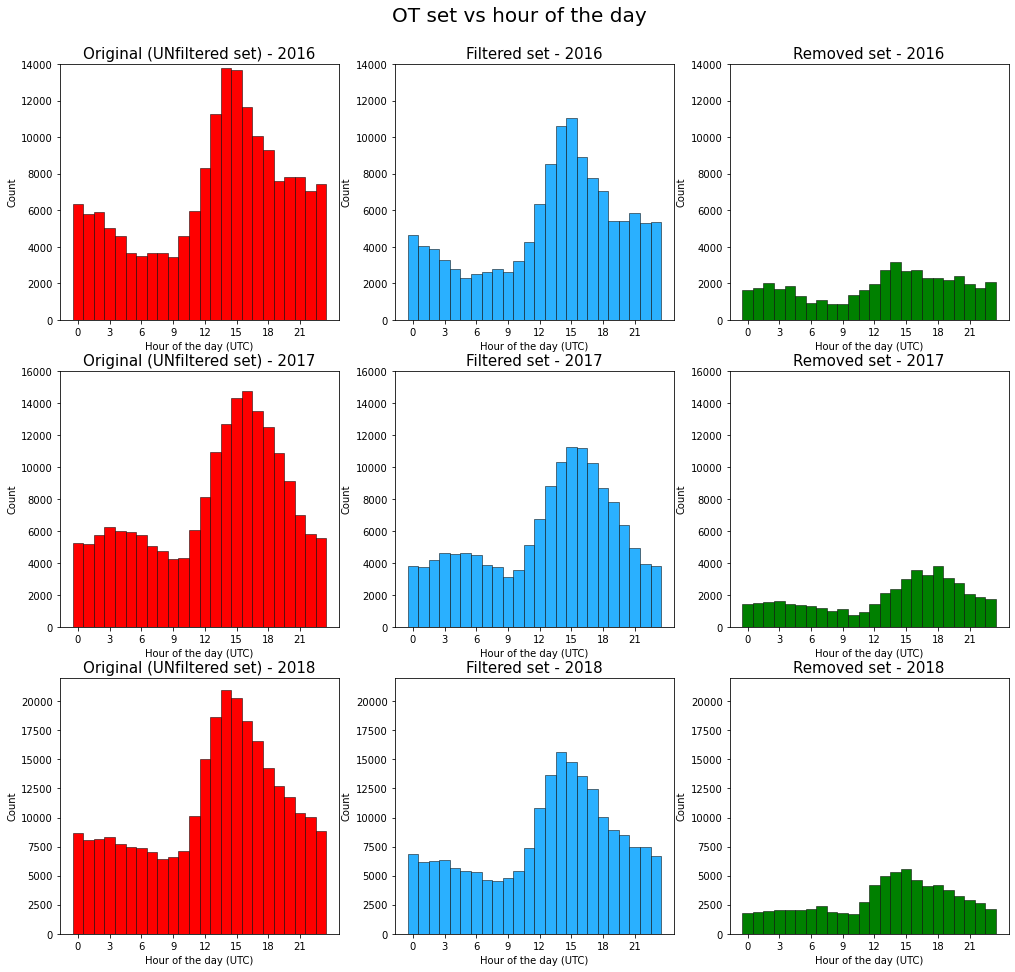

In [63]:
#Histogram of OTs distribution dep. on the hour of the day:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(17,16))

ax1.hist(pd.to_datetime(all_OTset_2016['time']).dt.hour, bins=np.arange(25)-0.5,
         facecolor = 'red', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax1.set_xticks(np.arange(0, 24, 3))
ax1.set_ylabel('Count', fontsize=10)
ax1.set_xlabel('Hour of the day (UTC)', fontsize=10)
ax1.set_title('Original (UNfiltered set) - 2016', fontsize=15);
ax1.set_ylim([0,14000])

ax2.hist(pd.to_datetime(filt_OTset_2016['time']).dt.hour, bins=np.arange(25)-0.5,
         facecolor = '#2ab0ff', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax2.set_xticks(np.arange(0, 24, 3))
ax2.set_ylabel('Count', fontsize=10)
ax2.set_xlabel('Hour of the day (UTC)', fontsize=10)
ax2.set_title('Filtered set - 2016', fontsize=15);
ax2.set_ylim([0,14000])

ax3.hist(pd.to_datetime(remv_OTset_2016['time']).dt.hour, bins=np.arange(25)-0.5,
         facecolor = 'green', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax3.set_xticks(np.arange(0, 24, 3))
ax3.set_ylabel('Count', fontsize=10)
ax3.set_xlabel('Hour of the day (UTC)', fontsize=10)
ax3.set_title('Removed set - 2016', fontsize=15);
ax3.set_ylim([0,14000])


ax4.hist(pd.to_datetime(all_OTset_2017['time']).dt.hour, bins=np.arange(25)-0.5,
         facecolor = 'red', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax4.set_xticks(np.arange(0, 24, 3))
ax4.set_ylabel('Count', fontsize=10)
ax4.set_xlabel('Hour of the day (UTC)', fontsize=10)
ax4.set_title('Original (UNfiltered set) - 2017', fontsize=15);
ax4.set_ylim([0,16000]);

ax5.hist(pd.to_datetime(filt_OTset_2017['time']).dt.hour, bins=np.arange(25)-0.5,
         facecolor = '#2ab0ff', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax5.set_xticks(np.arange(0, 24, 3))
ax5.set_ylabel('Count', fontsize=10)
ax5.set_xlabel('Hour of the day (UTC)', fontsize=10)
ax5.set_title('Filtered set - 2017', fontsize=15);
ax5.set_ylim([0,16000])

ax6.hist(pd.to_datetime(remv_OTset_2017['time']).dt.hour, bins=np.arange(25)-0.5,
         facecolor = 'green', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax6.set_xticks(np.arange(0, 24, 3))
ax6.set_ylabel('Count', fontsize=10)
ax6.set_xlabel('Hour of the day (UTC)', fontsize=10)
ax6.set_title('Removed set - 2017', fontsize=15);
ax6.set_ylim([0,16000])


ax7.hist(pd.to_datetime(all_OTset_2018['time']).dt.hour, bins=np.arange(25)-0.5,
         facecolor = 'red', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax7.set_xticks(np.arange(0, 24, 3))
ax7.set_ylabel('Count', fontsize=10)
ax7.set_xlabel('Hour of the day (UTC)', fontsize=10)
ax7.set_title('Original (UNfiltered set) - 2018', fontsize=15);
ax7.set_ylim([0,22000]);

ax8.hist(pd.to_datetime(filt_OTset_2018['time']).dt.hour, bins=np.arange(25)-0.5,
         facecolor = '#2ab0ff', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax8.set_xticks(np.arange(0, 24, 3))
ax8.set_ylabel('Count', fontsize=10)
ax8.set_xlabel('Hour of the day (UTC)', fontsize=10)
ax8.set_title('Filtered set - 2018', fontsize=15);
ax8.set_ylim([0,22000])

ax9.hist(pd.to_datetime(remv_OTset_2018['time']).dt.hour, bins=np.arange(25)-0.5,
         facecolor = 'green', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax9.set_xticks(np.arange(0, 24, 3))
ax9.set_ylabel('Count', fontsize=10)
ax9.set_xlabel('Hour of the day (UTC)', fontsize=10)
ax9.set_title('Removed set - 2018', fontsize=15);
ax9.set_ylim([0,22000])

#fig.subplots_adjust(hspace=.5)
fig.suptitle('OT set vs hour of the day', fontsize=20, y=.93);

#pl.savefig(plt_fold + f"/hist_OTvsHour_2016-2018.pdf",dpi=200, bbox_inches='tight')

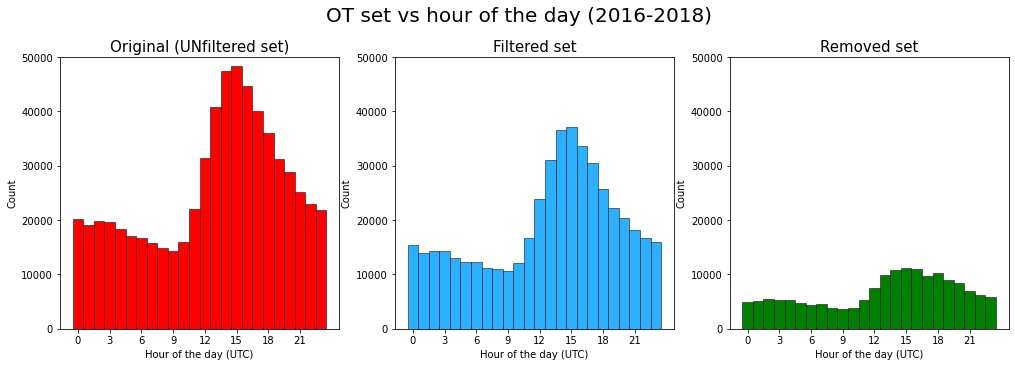

In [69]:
#Histogram of OTs distribution dep. on the hour of the day: CONCAT YEARS TOGETHER
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,5))

ax1.hist(pd.to_datetime(all_OTset_2016_2017_2018['time']).dt.hour, bins=np.arange(25)-0.5,
         facecolor = 'red', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax1.set_xticks(np.arange(0, 24, 3))
ax1.set_ylabel('Count', fontsize=10)
ax1.set_xlabel('Hour of the day (UTC)', fontsize=10)
ax1.set_title('Original (UNfiltered set)', fontsize=15);
ax1.set_ylim([0,50000])

ax2.hist(pd.to_datetime(filt_OTset_2016_2017_2018['time']).dt.hour, bins=np.arange(25)-0.5,
         facecolor = '#2ab0ff', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax2.set_xticks(np.arange(0, 24, 3))
ax2.set_ylabel('Count', fontsize=10)
ax2.set_xlabel('Hour of the day (UTC)', fontsize=10)
ax2.set_title('Filtered set', fontsize=15);
ax2.set_ylim([0,50000])

ax3.hist(pd.to_datetime(remv_OTset_2016_2017_2018['time']).dt.hour, bins=np.arange(25)-0.5,
         facecolor = 'green', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax3.set_xticks(np.arange(0, 24, 3))
ax3.set_ylabel('Count', fontsize=10)
ax3.set_xlabel('Hour of the day (UTC)', fontsize=10)
ax3.set_title('Removed set', fontsize=15);
ax3.set_ylim([0,50000]);

fig.suptitle('OT set vs hour of the day (2016-2018)', fontsize=20, y=1.02);

#pl.savefig(plt_fold + f"/hist_OTvsHour_2016-2018.png",dpi=200, bbox_inches='tight')

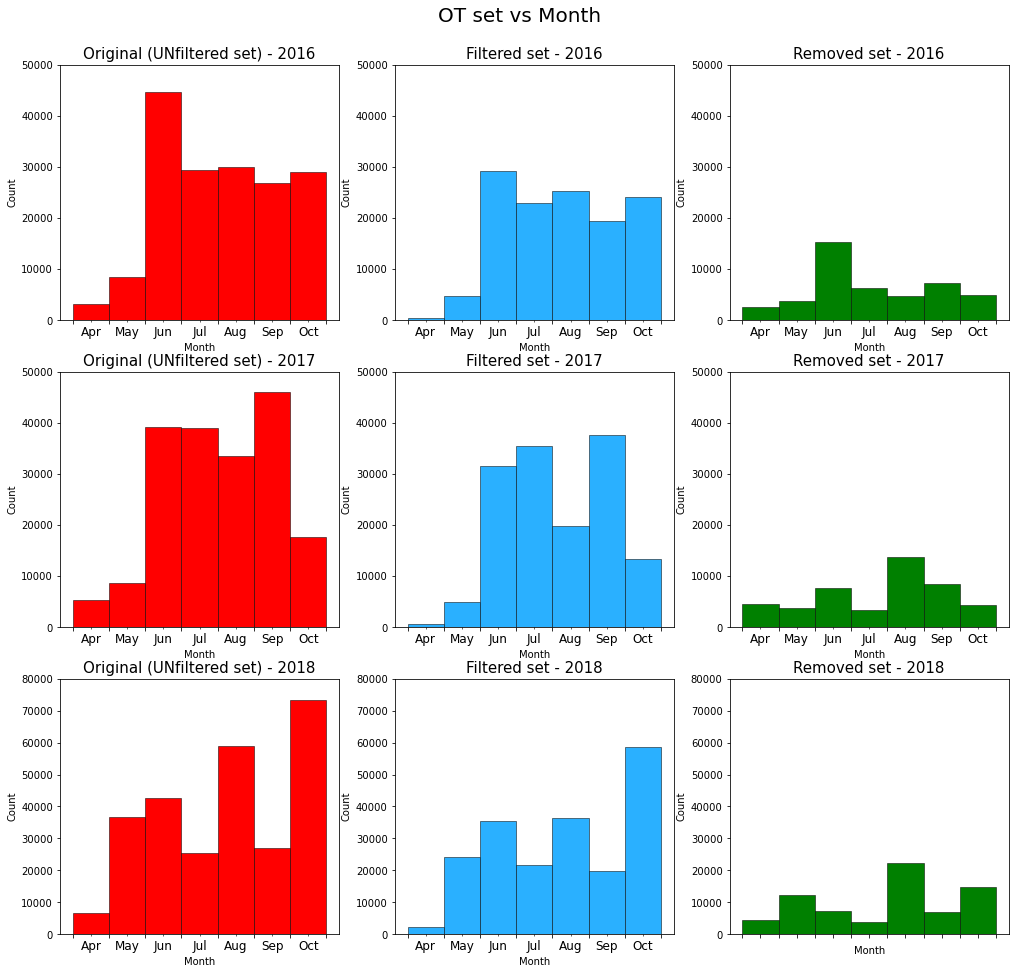

In [103]:
#Histogram of OTs distribution dep. on the MONTH:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(17,16))

ax1.hist(pd.to_datetime(all_OTset_2016['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = 'red', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=8)
ax1.set_xticklabels('')
ax1.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax1.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_xlabel('Month', fontsize=10)
ax1.set_title('Original (UNfiltered set) - 2016', fontsize=15);
ax1.set_ylim([0,50000])

ax2.hist(pd.to_datetime(filt_OTset_2016['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = '#2ab0ff', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax2.set_xticklabels('')
ax2.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax2.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax2.set_ylabel('Count', fontsize=10)
ax2.set_xlabel('Month', fontsize=10)
ax2.set_title('Filtered set - 2016', fontsize=15);
ax2.set_ylim([0,50000])

ax3.hist(pd.to_datetime(remv_OTset_2016['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = 'green', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax3.set_xticklabels('')
ax3.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax3.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax3.set_ylabel('Count', fontsize=10)
ax3.set_xlabel('Month', fontsize=10)
ax3.set_title('Removed set - 2016', fontsize=15);
ax3.set_ylim([0,50000])


ax4.hist(pd.to_datetime(all_OTset_2017['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = 'red', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax4.set_xticklabels('')
ax4.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax4.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax4.set_ylabel('Count', fontsize=10)
ax4.set_xlabel('Month', fontsize=10)
ax4.set_title('Original (UNfiltered set) - 2017', fontsize=15);
ax4.set_ylim([0,50000]);

ax5.hist(pd.to_datetime(filt_OTset_2017['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = '#2ab0ff', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax5.set_xticklabels('')
ax5.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax5.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax5.set_ylabel('Count', fontsize=10)
ax5.set_xlabel('Month', fontsize=10)
ax5.set_title('Filtered set - 2017', fontsize=15);
ax5.set_ylim([0,50000])

ax6.hist(pd.to_datetime(remv_OTset_2017['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = 'green', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax6.set_xticklabels('')
ax6.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax6.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax6.set_ylabel('Count', fontsize=10)
ax6.set_xlabel('Month', fontsize=10)
ax6.set_title('Removed set - 2017', fontsize=15);
ax6.set_ylim([0,50000])


ax7.hist(pd.to_datetime(all_OTset_2018['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = 'red', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax7.set_xticklabels('')
ax7.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax7.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax7.set_ylabel('Count', fontsize=10)
ax7.set_xlabel('Month', fontsize=10)
ax7.set_title('Original (UNfiltered set) - 2018', fontsize=15);
ax7.set_ylim([0,80000]);

ax8.hist(pd.to_datetime(filt_OTset_2018['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = '#2ab0ff', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax8.set_xticklabels('')
ax8.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax8.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax8.set_ylabel('Count', fontsize=10)
ax8.set_xlabel('Month', fontsize=10)
ax8.set_title('Filtered set - 2018', fontsize=15);
ax8.set_ylim([0,80000])

ax9.hist(pd.to_datetime(remv_OTset_2018['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = 'green', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax9.set_xticklabels('')
ax9.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax9.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax9.set_ylabel('Count', fontsize=10)
ax9.set_xlabel('Month', fontsize=10)
ax9.set_title('Removed set - 2018', fontsize=15);
ax9.set_ylim([0,80000])

#fig.subplots_adjust(hspace=.5)
fig.suptitle('OT set vs Month', fontsize=20, y=.93);

pl.savefig(plt_fold + f"/hist_OTvsMonth_2016-2018_sepYears.png",dpi=200, bbox_inches='tight')

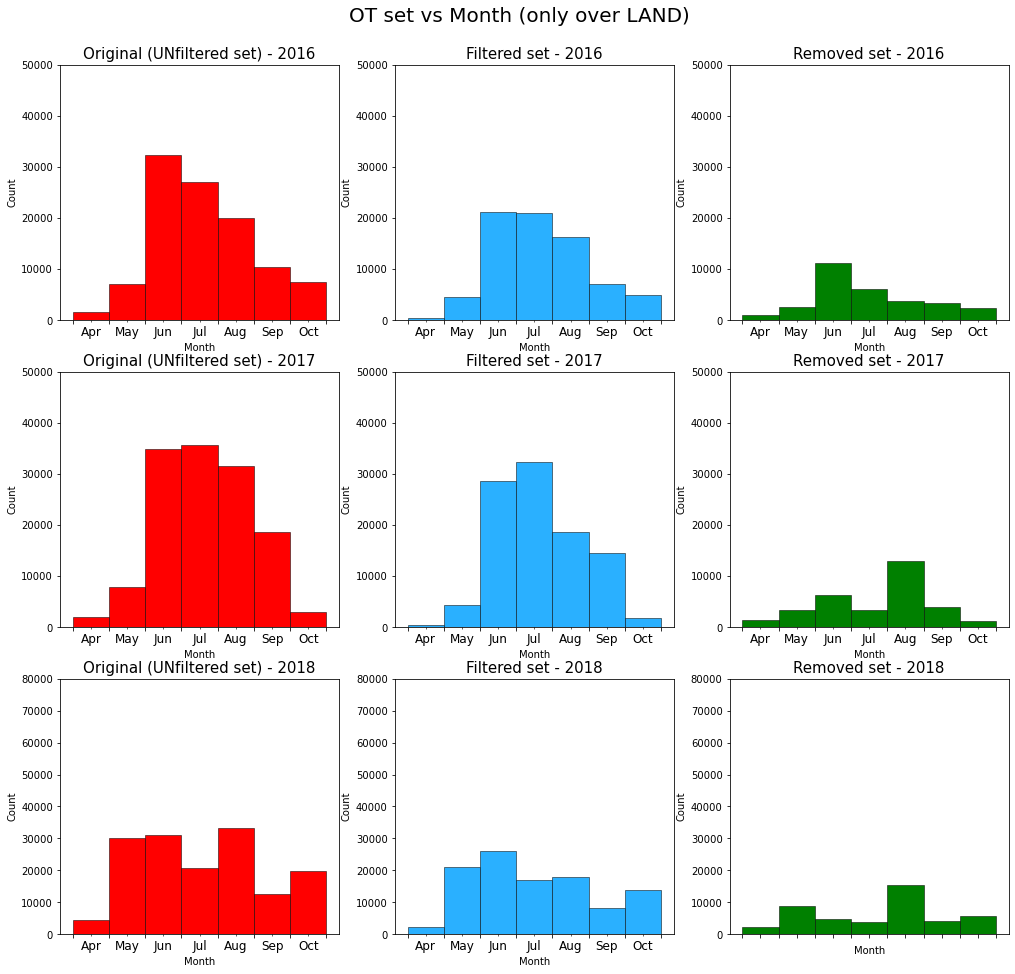

In [102]:
#Histogram of OTs distribution dep. on the MONTH only OVER LAND:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(17,16))

ax1.hist(pd.to_datetime(all_OTset_2016_land['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = 'red', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=8)
ax1.set_xticklabels('')
ax1.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax1.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_xlabel('Month', fontsize=10)
ax1.set_title('Original (UNfiltered set) - 2016', fontsize=15);
ax1.set_ylim([0,50000])

ax2.hist(pd.to_datetime(filt_OTset_2016_land['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = '#2ab0ff', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax2.set_xticklabels('')
ax2.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax2.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax2.set_ylabel('Count', fontsize=10)
ax2.set_xlabel('Month', fontsize=10)
ax2.set_title('Filtered set - 2016', fontsize=15);
ax2.set_ylim([0,50000])

ax3.hist(pd.to_datetime(remv_OTset_2016_land['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = 'green', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax3.set_xticklabels('')
ax3.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax3.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax3.set_ylabel('Count', fontsize=10)
ax3.set_xlabel('Month', fontsize=10)
ax3.set_title('Removed set - 2016', fontsize=15);
ax3.set_ylim([0,50000])


ax4.hist(pd.to_datetime(all_OTset_2017_land['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = 'red', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax4.set_xticklabels('')
ax4.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax4.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax4.set_ylabel('Count', fontsize=10)
ax4.set_xlabel('Month', fontsize=10)
ax4.set_title('Original (UNfiltered set) - 2017', fontsize=15);
ax4.set_ylim([0,50000]);

ax5.hist(pd.to_datetime(filt_OTset_2017_land['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = '#2ab0ff', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax5.set_xticklabels('')
ax5.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax5.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax5.set_ylabel('Count', fontsize=10)
ax5.set_xlabel('Month', fontsize=10)
ax5.set_title('Filtered set - 2017', fontsize=15);
ax5.set_ylim([0,50000])

ax6.hist(pd.to_datetime(remv_OTset_2017_land['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = 'green', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax6.set_xticklabels('')
ax6.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax6.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax6.set_ylabel('Count', fontsize=10)
ax6.set_xlabel('Month', fontsize=10)
ax6.set_title('Removed set - 2017', fontsize=15);
ax6.set_ylim([0,50000])


ax7.hist(pd.to_datetime(all_OTset_2018_land['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = 'red', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax7.set_xticklabels('')
ax7.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax7.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax7.set_ylabel('Count', fontsize=10)
ax7.set_xlabel('Month', fontsize=10)
ax7.set_title('Original (UNfiltered set) - 2018', fontsize=15);
ax7.set_ylim([0,80000]);

ax8.hist(pd.to_datetime(filt_OTset_2018_land['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = '#2ab0ff', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax8.set_xticklabels('')
ax8.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax8.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax8.set_ylabel('Count', fontsize=10)
ax8.set_xlabel('Month', fontsize=10)
ax8.set_title('Filtered set - 2018', fontsize=15);
ax8.set_ylim([0,80000])

ax9.hist(pd.to_datetime(remv_OTset_2018_land['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = 'green', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax9.set_xticklabels('')
ax9.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax9.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax9.set_ylabel('Count', fontsize=10)
ax9.set_xlabel('Month', fontsize=10)
ax9.set_title('Removed set - 2018', fontsize=15);
ax9.set_ylim([0,80000])

#fig.subplots_adjust(hspace=.5)
fig.suptitle('OT set vs Month (only over LAND)', fontsize=20, y=.93);

pl.savefig(plt_fold + f"/hist_OTvsMonth_2016-2018_sepYears_LAND.pdf",dpi=200, bbox_inches='tight')

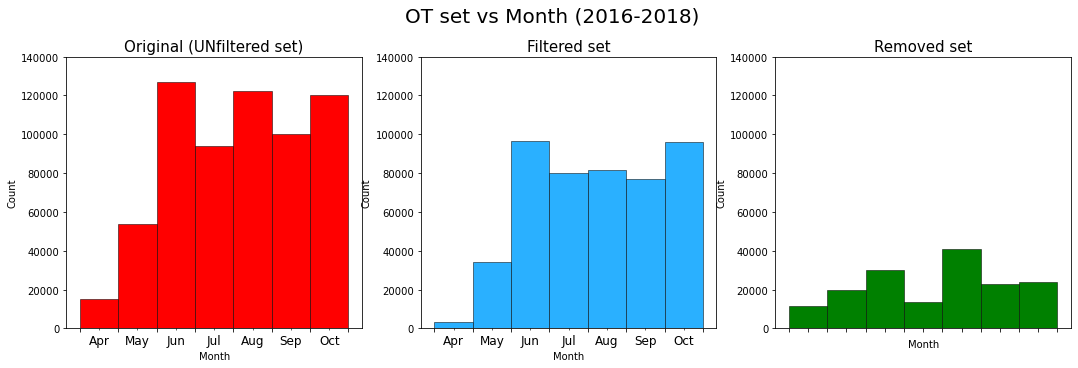

In [95]:
#Histogram of OTs distribution dep. on the MONTH:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))

ax1.hist(pd.to_datetime(all_OTset_2016_2017_2018['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = 'red', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=8)
ax1.set_xticklabels('')
ax1.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax1.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_xlabel('Month', fontsize=10)
ax1.set_title('Original (UNfiltered set)', fontsize=15);
ax1.set_ylim([0,140000])

ax2.hist(pd.to_datetime(filt_OTset_2016_2017_2018['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = '#2ab0ff', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax2.set_xticklabels('')
ax2.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax2.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax2.set_ylabel('Count', fontsize=10)
ax2.set_xlabel('Month', fontsize=10)
ax2.set_title('Filtered set', fontsize=15);
ax2.set_ylim([0,140000])

ax3.hist(pd.to_datetime(remv_OTset_2016_2017_2018['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = 'green', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax3.set_xticklabels('')
ax3.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax3.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax3.set_ylabel('Count', fontsize=10)
ax3.set_xlabel('Month', fontsize=10)
ax3.set_title('Removed set', fontsize=15);
ax3.set_ylim([0,140000])

fig.suptitle('OT set vs Month (2016-2018)', fontsize=20, y=1.02);

pl.savefig(plt_fold + f"/hist_OTvsMonth_2016-2018.pdf",dpi=200, bbox_inches='tight')

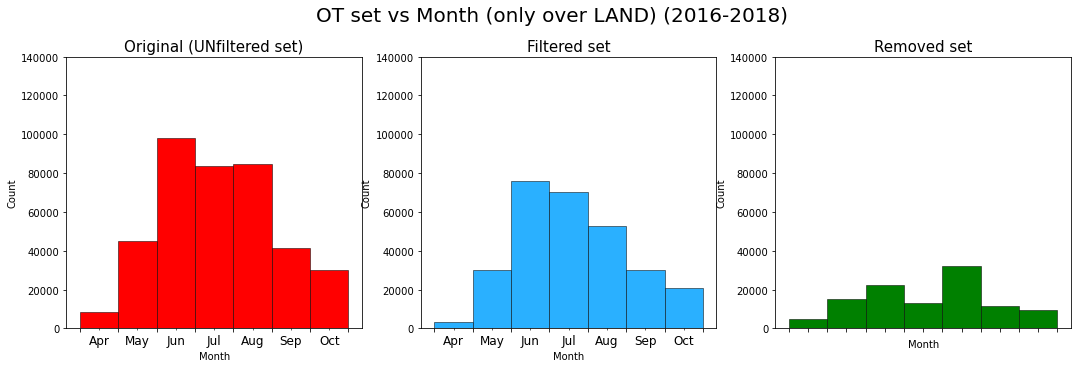

In [97]:
#Histogram of OTs distribution dep. on the MONTH only OVER LAND:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))

ax1.hist(pd.to_datetime(all_OTset_2016_2017_2018_land['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = 'red', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=8)
ax1.set_xticklabels('')
ax1.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax1.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_xlabel('Month', fontsize=10)
ax1.set_title('Original (UNfiltered set)', fontsize=15);
ax1.set_ylim([0,140000])

ax2.hist(pd.to_datetime(filt_OTset_2016_2017_2018_land['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = '#2ab0ff', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax2.set_xticklabels('')
ax2.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax2.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax2.set_ylabel('Count', fontsize=10)
ax2.set_xlabel('Month', fontsize=10)
ax2.set_title('Filtered set', fontsize=15);
ax2.set_ylim([0,140000])

ax3.hist(pd.to_datetime(remv_OTset_2016_2017_2018_land['time']).dt.month, bins=np.arange(4,12,1),
         facecolor = 'green', edgecolor='black', linewidth=0.5)
pl.locator_params(axis='x', nbins=24)
ax3.set_xticklabels('')
ax3.set_xticks([4.5,5.5,6.5,7.5,8.5,9.5,10.5], minor=True)
ax3.set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct'], minor=True, fontsize=12)
ax3.set_ylabel('Count', fontsize=10)
ax3.set_xlabel('Month', fontsize=10)
ax3.set_title('Removed set', fontsize=15);
ax3.set_ylim([0,140000])

fig.suptitle('OT set vs Month (only over LAND) (2016-2018)', fontsize=20, y=1.02);

pl.savefig(plt_fold + f"/hist_OTvsMonth_2016-2018_LAND.pdf",dpi=200, bbox_inches='tight')

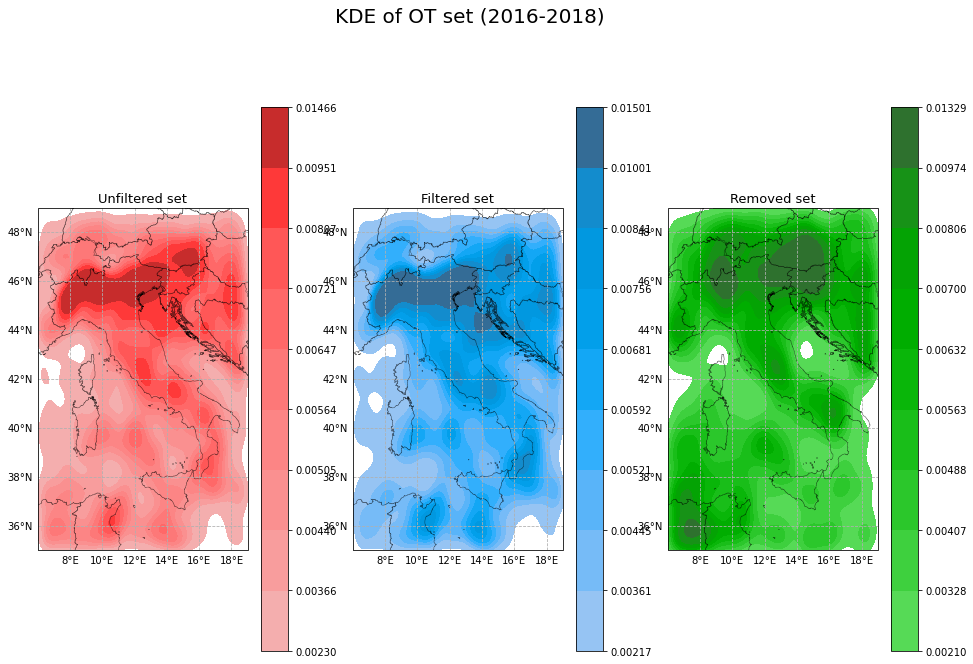

In [96]:
#KDE density functions

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,10), subplot_kw={'projection': ccrs.PlateCarree()})

sns.kdeplot(all_OTset_2016_2017_2018.lon, all_OTset_2016_2017_2018.lat, data=all_OTset_2016_2017_2018, 
            ax=ax1, shade=True, color="red", cbar=True, xlim=x_lim, ylim=y_lim)
#shapefiles    
for shp in sf_geo:
    shp.plot(ax=ax1, alpha = 0.5, facecolor = 'none', lw = 0.5, zorder=2)

gls = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax1.set_xlim(x_lim)
ax1.set_ylim(y_lim)
ax1.set_title('Unfiltered set', fontsize=13);


sns.kdeplot(filt_OTset_2016_2017_2018.lon, filt_OTset_2016_2017_2018.lat, data=filt_OTset_2016_2017_2018, 
            ax=ax2, shade=True, color="#2ab0ff", cbar=True, xlim=x_lim, ylim=y_lim)
#shapefiles    
for shp in sf_geo:
    shp.plot(ax=ax2, alpha = 0.5, facecolor = 'none', lw = 0.5, zorder=2)

gls = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax2.set_xlim(x_lim)
ax2.set_ylim(y_lim)
ax2.set_title('Filtered set', fontsize=13);

sns.kdeplot(remv_OTset_2016_2017_2018.lon, remv_OTset_2016_2017_2018.lat, data=remv_OTset_2016_2017_2018, 
            ax=ax3, shade=True,color="green", cbar=True, xlim=x_lim, ylim=y_lim)
#shapefiles    
for shp in sf_geo:
    shp.plot(ax=ax3, alpha = 0.5, facecolor = 'none', lw = 0.5, zorder=2)

gls = ax3.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax3.set_xlim(x_lim)
ax3.set_ylim(y_lim)
ax3.set_title('Removed set', fontsize=13);

fig.suptitle('KDE of OT set (2016-2018)', fontsize=20, y=1.02);

#pl.savefig(plt_fold + f"/KDE_OT_2016-2018.pdf",dpi=200, bbox_inches='tight')

#### - Spatial join (i.e. count number of OTs in a cell) between the points and the grid (for the moment 10km grid SPHERA used) to count  Number of OTs in grid

In [110]:
#Read SPHERA data (10km grid) and couple box number to coordinate locations:
sfg_sp = gpd.read_file(fold + "data/lampinet/mask/grid_10_49N.shp", encoding='latin-1')

In [111]:
#add columns of 1s to be summed in the spatial join with grid:
all_OTset_2016_2017_2018['N_OT'] = 1
filt_OTset_2016_2017_2018['N_OT'] = 1
remv_OTset_2016_2017_2018['N_OT'] = 1

points_allOT = all_OTset_2016_2017_2018
points_filtOT = filt_OTset_2016_2017_2018
points_remvOT = remv_OTset_2016_2017_2018
grid = sfg_sp

#spatial join between points and grid
pointInPolys_allOT = sjoin(points_allOT, grid, how='left').drop(['index_right'],axis=1)
pointInPolys_filtOT = sjoin(points_filtOT, grid, how='left').drop(['index_right'],axis=1)
pointInPolys_remvOT = sjoin(points_remvOT, grid, how='left').drop(['index_right'],axis=1)

#sum points in each grid cell
pointSumByPoly_allOT = pointInPolys_allOT.groupby('FID')['N_OT'].agg(['sum'])
pointSumByPoly_filtOT = pointInPolys_filtOT.groupby('FID')['N_OT'].agg(['sum'])
pointSumByPoly_remvOT = pointInPolys_remvOT.groupby('FID')['N_OT'].agg(['sum'])

#create grid with associated number of OTs for each grid:
allOT_countOnGrid = sfg_sp.copy()
filtOT_countOnGrid = sfg_sp.copy()
remvOT_countOnGrid = sfg_sp.copy()

allOT_countOnGrid['N_OT'] = pointSumByPoly_allOT['sum']
filtOT_countOnGrid['N_OT'] = pointSumByPoly_filtOT['sum']
remvOT_countOnGrid['N_OT'] = pointSumByPoly_remvOT['sum']

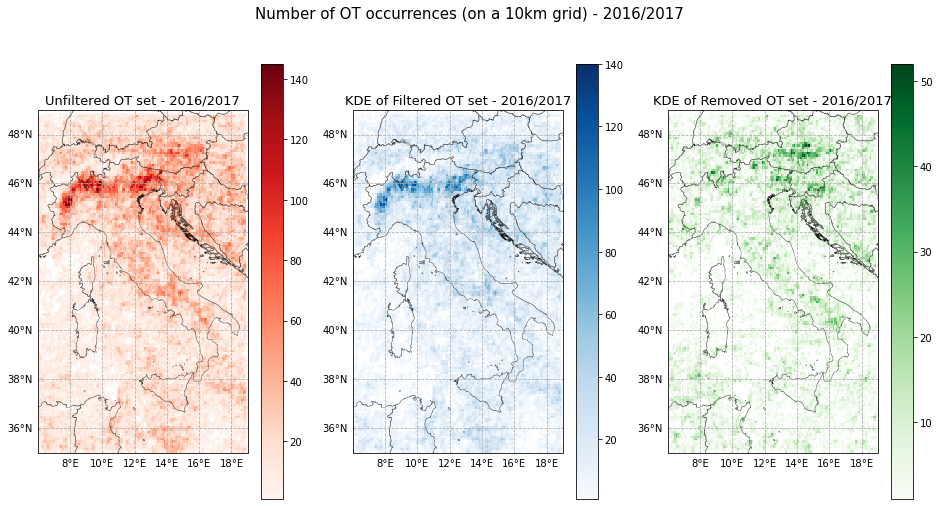

In [304]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,8), subplot_kw={'projection': ccrs.PlateCarree()})

allOT_countOnGrid.plot(column='N_OT', ax=ax1, cmap='Reds', kind='geo', zorder=1, legend=True)
#shapefiles    
for shp in sf_geo:
    shp.plot(ax=ax1, alpha = 0.5, facecolor = 'none', lw = 0.5, zorder=2)

gls = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax1.set_xlim(x_lim)
ax1.set_ylim(y_lim)
ax1.set_title('Unfiltered set', fontsize=13);

filtOT_countOnGrid.plot(column='N_OT', ax=ax2, cmap='Blues', kind='geo', zorder=1, legend=True)
#shapefiles    
for shp in sf_geo:
    shp.plot(ax=ax2, alpha = 0.5, facecolor = 'none', lw = 0.5, zorder=2)

gls = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax2.set_xlim(x_lim)
ax2.set_ylim(y_lim)
ax2.set_title('Filtered set', fontsize=13);

remvOT_countOnGrid.plot(column='N_OT', ax=ax3, cmap='Greens', kind='geo', zorder=1, legend=True)
#shapefiles    
for shp in sf_geo:
    shp.plot(ax=ax3, alpha = 0.5, facecolor = 'none', lw = 0.5, zorder=2)

gls = ax3.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax3.set_xlim(x_lim)
ax3.set_ylim(y_lim)
ax3.set_title('Removed set', fontsize=13);

fig.suptitle('Number of OT occurrences (on a 10km grid) - 2016-2018', fontsize=15);

pl.savefig(plt_fold + f"/N_OTs_10km_2016-2018.pdf",dpi=200, bbox_inches='tight')

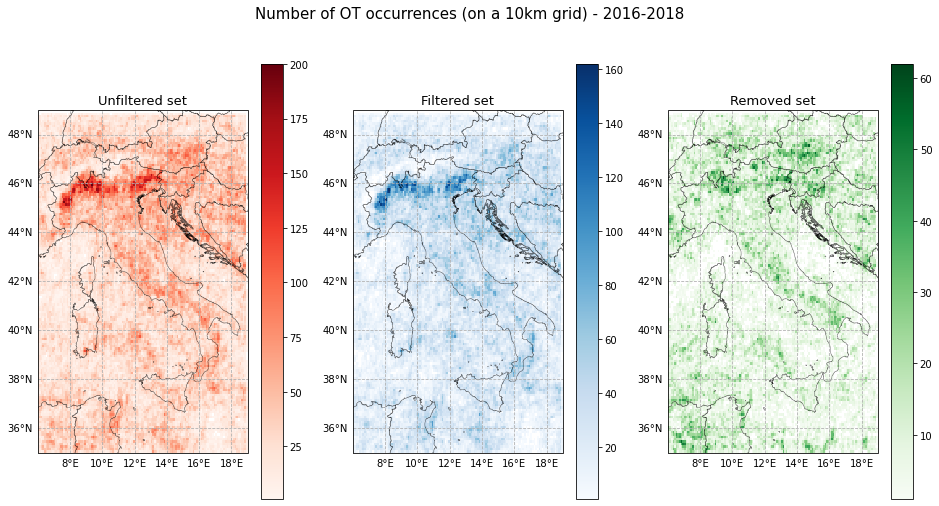

In [113]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,8), subplot_kw={'projection': ccrs.PlateCarree()})

allOT_countOnGrid.plot(column='N_OT', ax=ax1, cmap='Reds', kind='geo', zorder=1, legend=True)
#shapefiles    
for shp in sf_geo:
    shp.plot(ax=ax1, alpha = 0.5, facecolor = 'none', lw = 0.5, zorder=2)

gls = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax1.set_xlim(x_lim)
ax1.set_ylim(y_lim)
ax1.set_title('Unfiltered set', fontsize=13);

filtOT_countOnGrid.plot(column='N_OT', ax=ax2, cmap='Blues', kind='geo', zorder=1, legend=True)
#shapefiles    
for shp in sf_geo:
    shp.plot(ax=ax2, alpha = 0.5, facecolor = 'none', lw = 0.5, zorder=2)

gls = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax2.set_xlim(x_lim)
ax2.set_ylim(y_lim)
ax2.set_title('Filtered set', fontsize=13);

remvOT_countOnGrid.plot(column='N_OT', ax=ax3, cmap='Greens', kind='geo', zorder=1, legend=True)
#shapefiles    
for shp in sf_geo:
    shp.plot(ax=ax3, alpha = 0.5, facecolor = 'none', lw = 0.5, zorder=2)

gls = ax3.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax3.set_xlim(x_lim)
ax3.set_ylim(y_lim)
ax3.set_title('Removed set', fontsize=13);

fig.suptitle('Number of OT occurrences (on a 10km grid) - 2016-2018', fontsize=15);

pl.savefig(plt_fold + f"/N_OTs_10km_2016-2018.png",dpi=200, bbox_inches='tight')